In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [6]:
df = pd.read_csv("C:/Users/yasir/Downloads/heart_failure_clinical_records_dataset.csv")

In [8]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


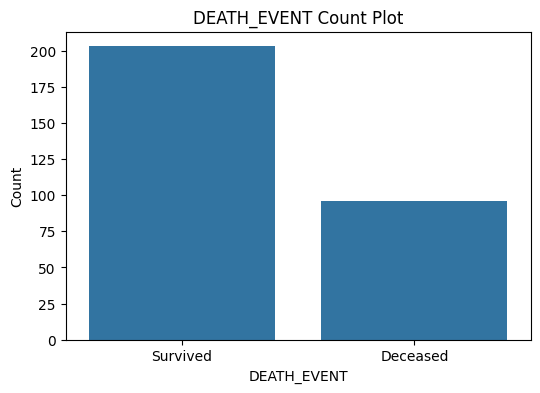

In [24]:
# Create a countplot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('DEATH_EVENT Count Plot')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.xticks([0, 1], ['Survived', 'Deceased'])  # Assuming 0 means survived and 1 means deceased
plt.show()

In [26]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


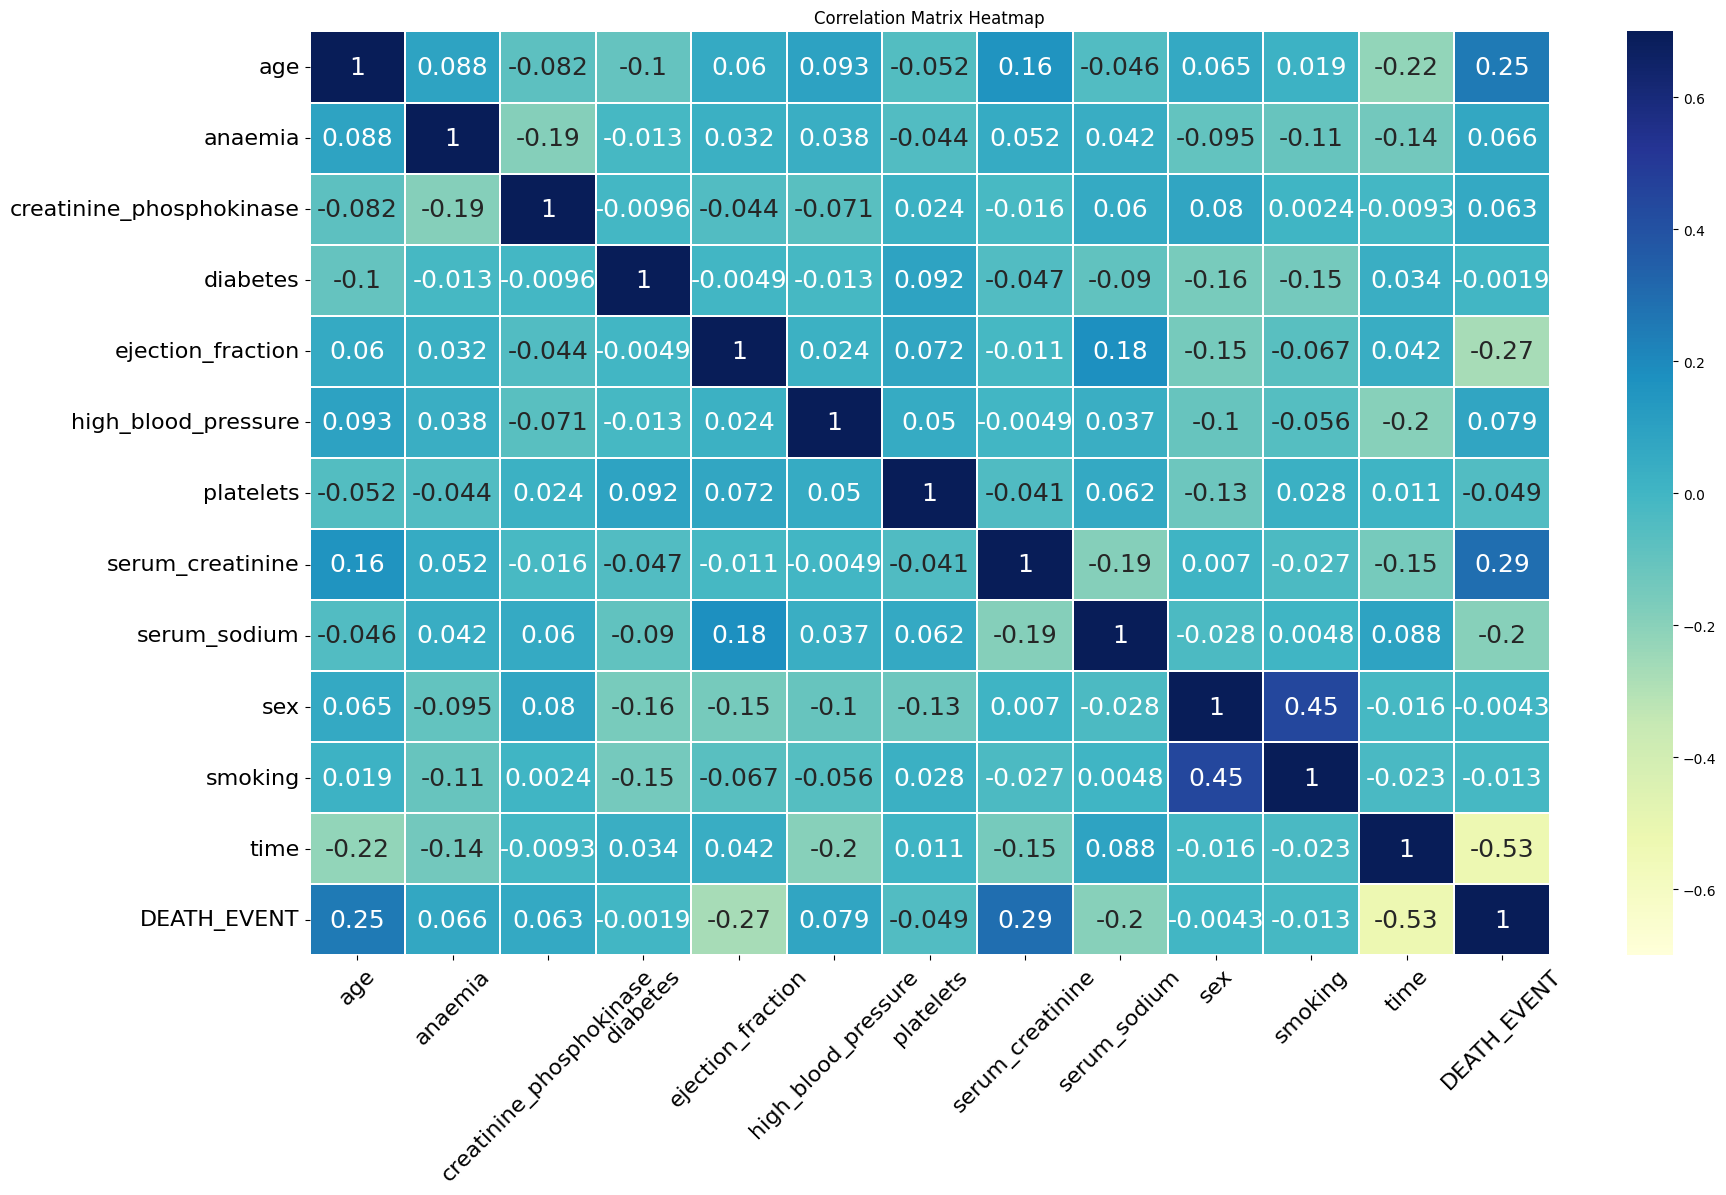

In [28]:
plt.subplots(figsize=(20,12))
heatmap=sns.heatmap(corr_matrix, vmin=-0.7, vmax=0.7, annot=True, linewidths=0.2, cmap='YlGnBu', 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot_kws = {'size': 18})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better visibility
plt.yticks(rotation=0) #keep the y tick horizontal

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)  # Adjust the font size as desired
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)  # Adjust the font size as desired
plt.show()

In [30]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Create Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
# Predictions
logistic_pred = logistic_model.predict(X_test_scaled)

In [38]:
print('Accuracy is', accuracy_score(y_test, logistic_pred))

Accuracy is 0.8


In [42]:
# Confusion Matrix and Classification Report
logistic_cm = confusion_matrix(y_test, logistic_pred)

In [44]:
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Confusion Matrix:
[[34  1]
 [11 14]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



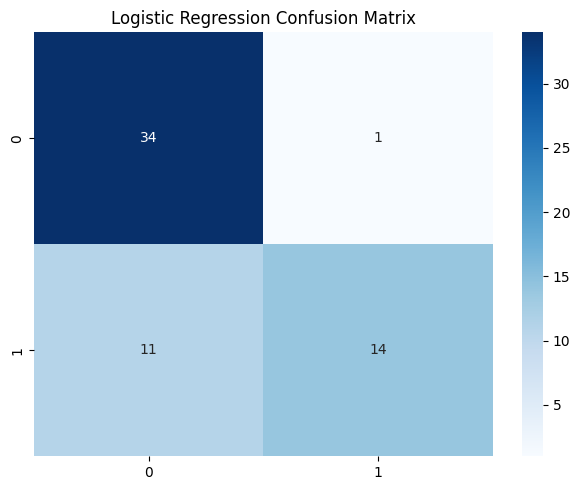

In [46]:
# Visualization: Heatmap of Confusion Matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(logistic_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Logistic Regression Confusion Matrix")


plt.tight_layout()
plt.show()

In [48]:
# Define new patient data
new_patient = [[50, 1, 111, 0, 20, 0, 210000, 1.9, 137, 1, 0,7]]
# Standardize the new data using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Make predictions for the new passenger
prediction = logistic_model.predict(new_patient_scaled)

if prediction[0] == 0:
    print("no probability of a death event")
else:
    print("death event is probable")

death event is probable


C:\Users\yasir\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
# Define new patient data
new_patient = [[24, 0, 1, 0, 20, 0, 210000, 1, 80, 0, 0,8]]
# Standardize the new data using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Make predictions for the new passenger
prediction = logistic_model.predict(new_patient_scaled)

if prediction[0] == 0:
    print("no probability of a death event")
else:
    print("death event is probable")

death event is probable


C:\Users\yasir\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
